In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from mpl_toolkits.basemap import Basemap
import geopandas

## US Exploratory Data Analysis, Cleaning, and Processing

In [4]:
confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
confirmed_df = pd.read_csv(confirmed_url)
deaths_df = pd.read_csv(deaths_url)
#df.head()

In [5]:
def analyze_df(df, head_rows=5):
    print(f"1. First {head_rows} rows of data:\n")
    display(df.head())

    print(f"\n 2. Data Info:\n")
    display(df.info())

    print(f"\n 3. Description of Data:\n")
    display(df.describe().transpose())

    print(f" 4. Missing Values: \n")
    missing_values = df.isnull().sum()
    display(missing_values)

In [6]:
# handle missing values

# confirmed
c_null_columns = confirmed_df.isnull().any()
display(print(f'{c_null_columns[:15]}'))

# deaths
d_null_columns = deaths_df.isnull().any()
display(print(f'\n\n {d_null_columns[:15]}'))

confirmed_df.dropna()
deaths_df.dropna()

# FIPS (10 nans) and Admin2 (6 nans), well just drop them for now

UID               False
iso2              False
iso3              False
code3             False
FIPS               True
Admin2             True
Province_State    False
Country_Region    False
Lat               False
Long_             False
Combined_Key      False
1/22/20           False
1/23/20           False
1/24/20           False
1/25/20           False
dtype: bool


None



 UID               False
iso2              False
iso3              False
code3             False
FIPS               True
Admin2             True
Province_State    False
Country_Region    False
Lat               False
Long_             False
Combined_Key      False
Population        False
1/22/20           False
1/23/20           False
1/24/20           False
dtype: bool


None

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,230,232,232,232,232,232,232,232,232,232
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,724,726,726,726,726,726,726,726,727,727
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,103,103,103,103,103,103,103,103,103,103
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,109,109,109,109,109,109,109,109,109,109
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,261,261,261,261,261,261,261,261,261,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,16,16,16,16,16,16,16,16,16,16
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,43,43,43,43,43,43,43,43,43,43
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,50,50,50,50,50,50,50,51,51,51


In [7]:
# massage dataframe so that date columns are now rows and create num of Cases and Date columns

id_vars_c = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 
           'Country_Region', 'Lat', 'Long_', 'Combined_Key']	
df_c = confirmed_df.melt(id_vars=id_vars_c, var_name='Date', value_name='Cases')
display(df_c.head())

id_vars_d = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 
           'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population']
df_d = deaths_df.melt(id_vars=id_vars_d, var_name='Date', value_name='Deaths')
display(df_d.head())

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,Date,Deaths
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,1/22/20,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,1/22/20,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,1/22/20,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,1/22/20,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,1/22/20,0


In [8]:
# merge confirmed cases and deaths cases into one dataframe. confirm we have no duplicated 

merged_df = pd.merge(df_c, df_d[['UID', 'Date', 'Population', 'Deaths']], on=['UID', 'Date'], how='outer')
merged_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases,Population,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/1/21,0,55641,0
1,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/1/22,11,55641,0
2,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/1/23,8266,55641,34
3,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/10/21,0,55641,0
4,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/10/22,18,55641,0


In [9]:
# confirm we have no duplicates

duplicates = merged_df.duplicated().sum()
if duplicates:
    merged_df.drop_duplicates(inplace=True)
    print(f'{duplicates} duplicate rows dropped!')
else:
    print('OH YEAH NO DUPES')

OH YEAH NO DUPES


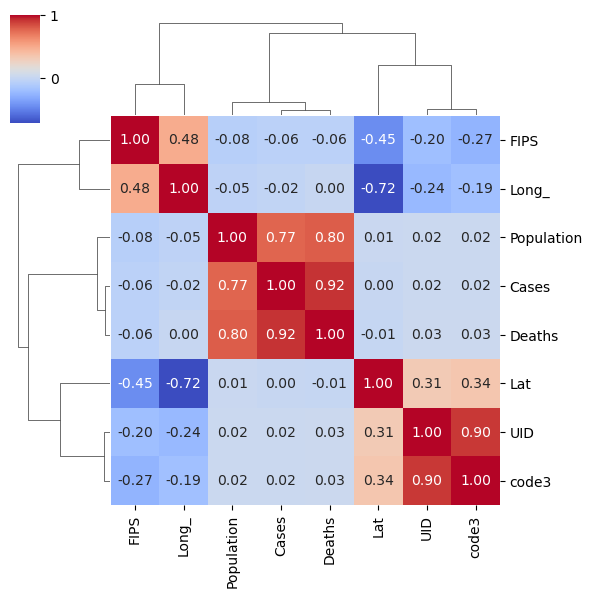

In [10]:
corr_matrix = merged_df.corr(numeric_only=True)
sns.clustermap(corr_matrix,
              annot=True,
              fmt='.2f',
              figsize=(6,6),
              cmap='coolwarm')

# strong positive correlation between (cases and deaths), (Population and Cases), (deaths and population)! 

## Begin Time Series Analysis (one month rn, for a specific location)

In [12]:
# change date column to datetime object
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%d/%y', errors='coerce')

In [13]:
unique_places = merged_df['Province_State'].unique().tolist()
print(unique_places)

['American Samoa', 'Guam', 'Northern Mariana Islands', 'Virgin Islands', 'Puerto Rico', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Diamond Princess', 'Grand Princess']


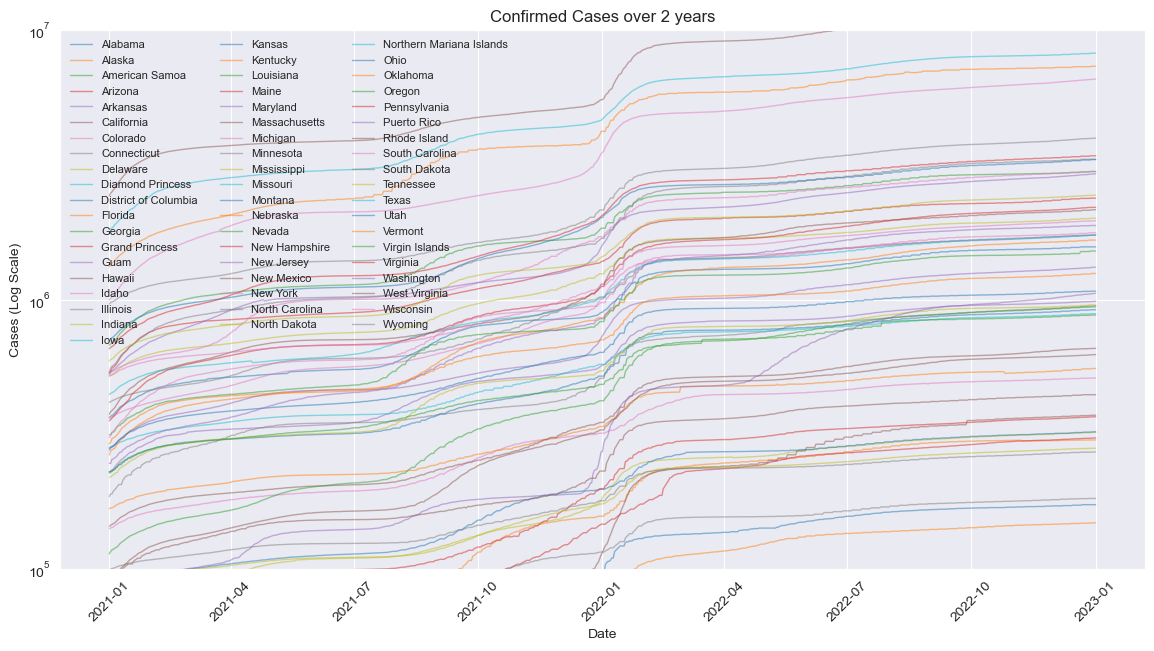

In [14]:
# select_locs = [ 'Connecticut']

# filter dataframe to plotcause she too big rn
filtered_df = merged_df[(merged_df['Date'] >= '2021-01-01') & 
                        (merged_df['Date'] <= '2023-01-01')] # (merged_df['Province_State'].isin(select_locs))

# aggregate cases by date (sum if multiple entries exist)
grouped_df = filtered_df.groupby(['Date', 'Province_State'], as_index=False).agg({'Cases': 'sum', 'Deaths': 'sum'})

categories = grouped_df['Province_State'].unique()
sns.set_style("darkgrid")
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,7))

for category in categories:
    
    # filter df for specific location
    filt_df = grouped_df[grouped_df['Province_State'] == category]
    plt.plot(filt_df['Date'], filt_df['Cases'], alpha=0.5, linewidth=1, label=category)

plt.xlabel('Date')
plt.ylabel('Cases (Log Scale)')
plt.title('Confirmed Cases over 2 years')

plt.xticks(rotation=45)
plt.yscale('log')

# most of the locations are clustered around this area
plt.ylim(10**5, 10**7)

# avoid clutter
plt.legend(loc="upper left", fontsize=8, ncol=3, frameon=False)
plt.grid(True)
plt.show()

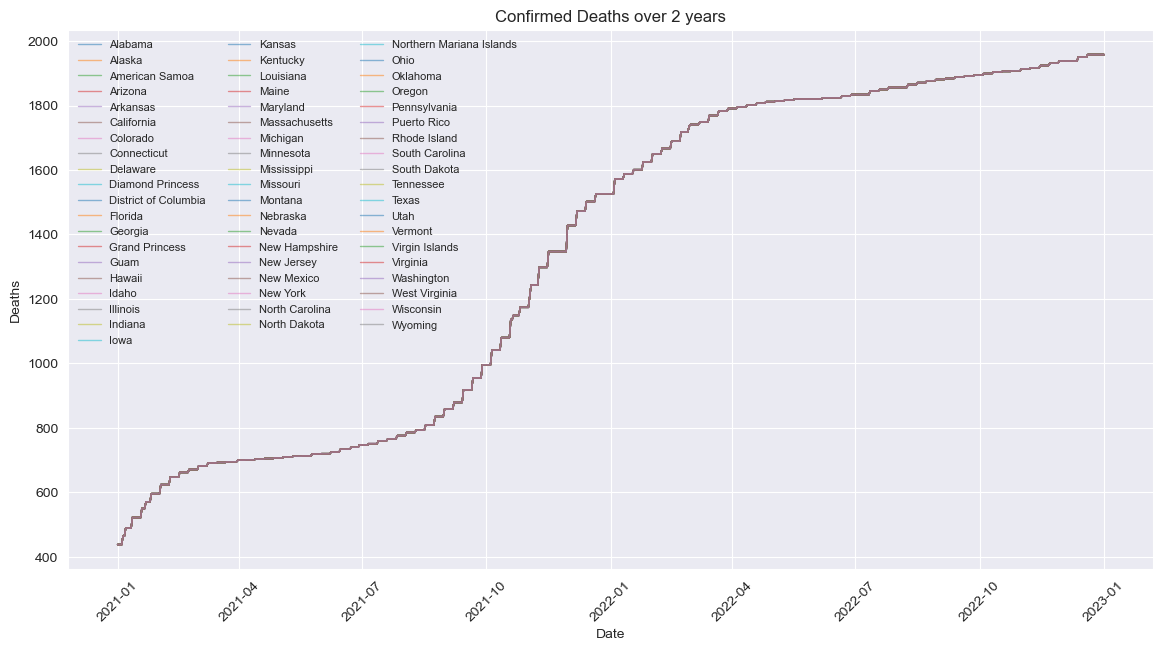

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,7))

for category in categories:
    plt.plot(filt_df['Date'], filt_df['Deaths'], alpha=0.5, linewidth=1, label=category)

plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Confirmed Deaths over 2 years')

plt.xticks(rotation=45)
#plt.yscale('log')
#plt.ylim(1250, 1260)

# avoid clutter
plt.legend(loc="upper left", fontsize=8, ncol=3, frameon=False)
plt.grid(True)
plt.show()
#why dis acting like that

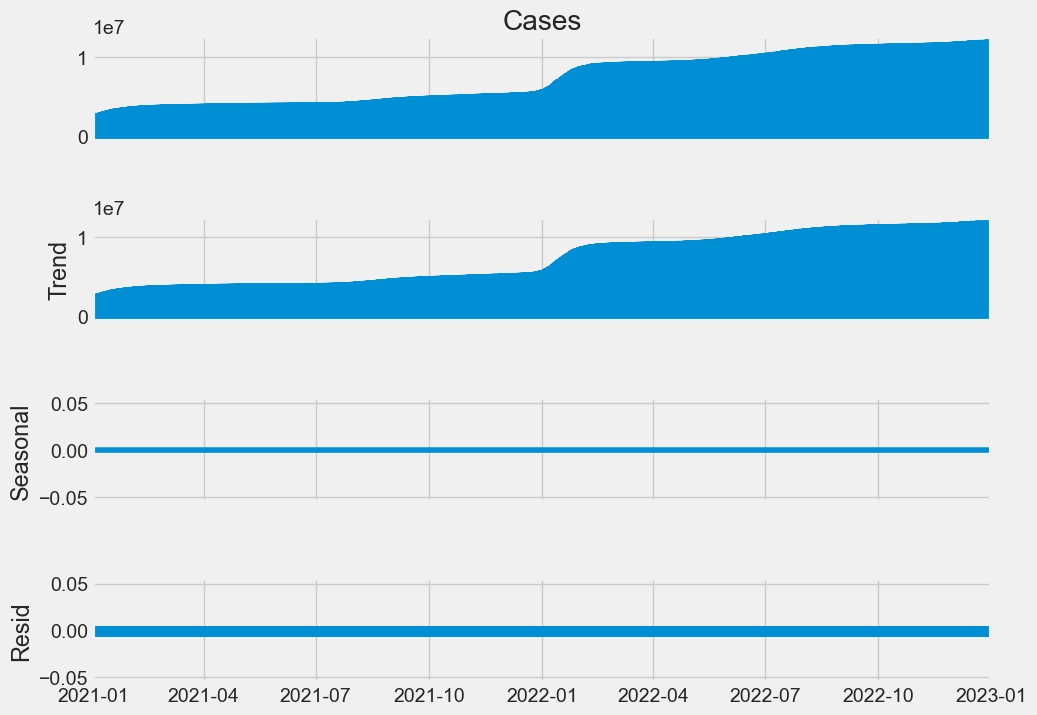

In [16]:
grouped_df = grouped_df.set_index('Date')
plt.style.use('fivethirtyeight')
decomposition = seasonal_decompose(grouped_df['Cases'], model='additive', period=1)  # annual seasonality

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

In [17]:
# p < 0.05 suggests stationarity
c_res = adfuller(grouped_df['Cases']) # stationary 
print(f"ADF Statistic for Cases: {c_res[0]}")
print(f"p-value for Cases: {c_res[1]}")

d_res = adfuller(grouped_df['Deaths']) # stationary
print(f"\nADF Statistic for Deaths: {d_res[0]}")
print(f"p-value for Deaths: {d_res[1]}")  

# stationary means statistical properties remain constant overtime in the DF. (Mean, variance, autocorrelation structure)

ADF Statistic for Cases: -6.868654150048658
p-value for Cases: 1.5357193873610826e-09

ADF Statistic for Deaths: -6.561616666491369
p-value for Deaths: 8.353807056561852e-09


In [19]:
# make date index and sort
merged_df.set_index('Date', inplace=True)
merged_df.sort_index(inplace=True)

merged_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Cases,Population,Deaths
Date,,,,,,,,,,,,,,
2020-01-22,84040005,US,USA,840,40005.0,Atoka,Oklahoma,US,34.373666,-96.038025,"Atoka, Oklahoma, US",0,13758,0
2020-01-22,84004009,US,USA,840,4009.0,Graham,Arizona,US,32.931669,-109.888218,"Graham, Arizona, US",0,38837,0
2020-01-22,84046065,US,USA,840,46065.0,Hughes,South Dakota,US,44.390915,-99.996611,"Hughes, South Dakota, US",0,17526,0
2020-01-22,84038085,US,USA,840,38085.0,Sioux,North Dakota,US,46.113233,-101.044015,"Sioux, North Dakota, US",0,4230,0
2020-01-22,84006063,US,USA,840,6063.0,Plumas,California,US,40.003560,-120.839524,"Plumas, California, US",0,18807,0


In [20]:
display(merged_df.isnull().sum())
merged_df.drop(columns=['FIPS', 'Admin2'], inplace=True)
display(merged_df.head())
#merged_df.to_csv('cleaned_data/cleaned_US_cases_and_deaths.csv')
#print('csv written!')

UID                   0
iso2                  0
iso3                  0
code3                 0
FIPS              11430
Admin2             6858
Province_State        0
Country_Region        0
Lat                   0
Long_                 0
Combined_Key          0
Cases                 0
Population            0
Deaths                0
dtype: int64

,UID,iso2,iso3,code3,Province_State,Country_Region,Lat,Long_,Combined_Key,Cases,Population,Deaths
Date,,,,,,,,,,,,
2020-01-22,84040005,US,USA,840,Oklahoma,US,34.373666,-96.038025,"Atoka, Oklahoma, US",0,13758,0
2020-01-22,84004009,US,USA,840,Arizona,US,32.931669,-109.888218,"Graham, Arizona, US",0,38837,0
2020-01-22,84046065,US,USA,840,South Dakota,US,44.390915,-99.996611,"Hughes, South Dakota, US",0,17526,0
2020-01-22,84038085,US,USA,840,North Dakota,US,46.113233,-101.044015,"Sioux, North Dakota, US",0,4230,0
2020-01-22,84006063,US,USA,840,California,US,40.003560,-120.839524,"Plumas, California, US",0,18807,0


## Begin GeoSpatial Stuff

In [39]:
# plotting geospatial stuffy
from shapely.geometry import Point

if 'latitutde' not in merged_df.columns and 'longitude' not in merged_df.columns:
    merged_df.rename({'Lat': 'latitude', 'Long_': 'longitude'}, axis='columns', inplace=True)

# create geometry (coordinate) column and turn df into gdf
merged_df['geometry'] = merged_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = geopandas.GeoDataFrame(merged_df, geometry='geometry', crs="EPSG:4326")

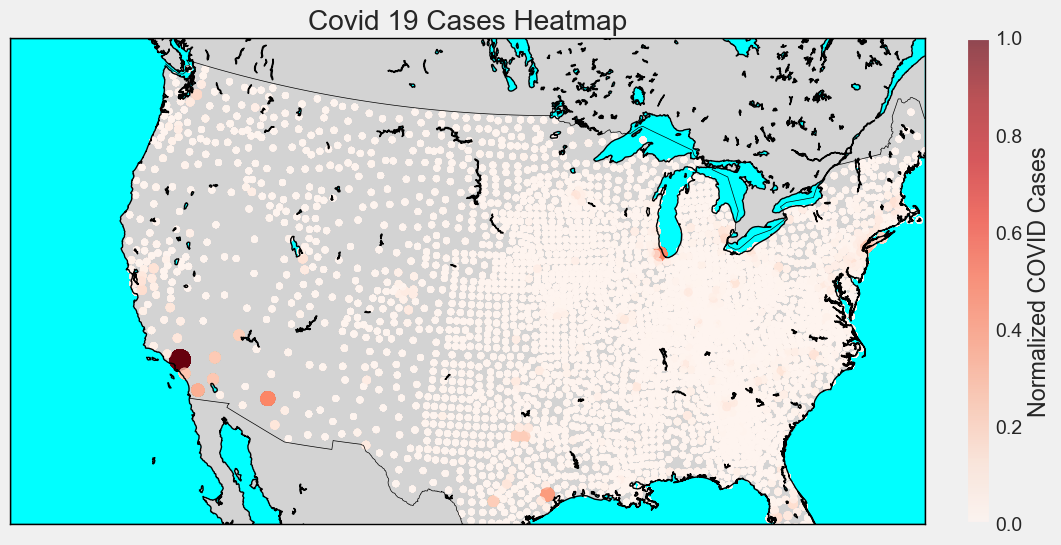

In [47]:
# earth heatmap plot 

lons = gdf['longitude'].values
lats = gdf['latitude'].values
cases = gdf['Cases'].values

# normalize case numbers for better visualizations
cases_scaled = (cases - cases.min()) / (cases.max() - cases.min())

fig, ax = plt.subplots(figsize=(12,6))
m = Basemap(projection='lcc', resolution='i', 
            lat_0=37.5, lon_0=-95,  # Centered on USA
            llcrnrlon=-125, llcrnrlat=24,  # Lower-left corner
            urcrnrlon=-66, urcrnrlat=50,  # Upper-right corner
            ax=ax)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')

# convert lat and lon into map coordinates
x, y = m(lons, lats)

# heatmap (scatter plot with alpha blending)
sc = ax.scatter(x, y, c=cases_scaled, cmap='Reds', alpha=0.7, s=cases_scaled * 200 + 20)

# color bar
cbar = plt.colorbar(sc, orientation='vertical', fraction=0.03, pad=0.04)
cbar.set_label("Normalized COVID Cases")

plt.title('Covid 19 Cases Heatmap')
plt.show()